# Linear Regression Evaluation

So far, we did a simple linear regression in the last example. We found out, that a girl with body height of 170cm will probably need a ring of size 56. But... how good, how exact, how reliable is the result? To find out, let's do some more calculations.

But first, I want to simplify the workflow. I don't want to type in the data any longer manually into lists in python. So I created an excel sheet with two columns. Column A contains the ring data as y-value, column b contains the height data as x-value.

Then I used pandas to read the excel-file into python. To see how it works, have a look at the following lines of code.

In [58]:
# a reference to the pandas library
import pandas as pd

# the excel file must be in the same directory as this notebook
# name of the excel file is ring-height.xlsx
excel_file= 'ring-height.xlsx'

# via panda, the contents ae read into a variable or data frame named data 
data = pd.read_excel(excel_file)

# get the length of entries in the file 
# and print out the data
entries = len(data)
data.head(entries)

,ring y,height x
0,47.1,156.3
1,46.8,158.9
2,49.3,160.8
3,53.2,179.6
4,47.7,156.6
5,49.0,165.1
6,50.6,165.9
7,47.1,156.7
8,51.7,167.8
9,47.8,160.8


As we can see, the data frame consists of a matrix with a column named "ring y" and a column named "height x". Pandas offers us the opportunity to get the ring values by using this command

In [15]:
print(data['ring y'])

0    47.1
1    46.8
2    49.3
3    53.2
4    47.7
5    49.0
6    50.6
7    47.1
8    51.7
9    47.8
Name: ring y, dtype: float64


The same way we get the height values. Type this command

In [19]:
print ("All height values")
print(data['height x'])
print(" ")
print ("Just the third height value (160.8)")
print(data['height x'][2])

All height values
0    156.3
1    158.9
2    160.8
3    179.6
4    156.6
5    165.1
6    165.9
7    156.7
8    167.8
9    160.8
Name: height x, dtype: float64
 
Just the third height value (160.8)
160.8


## Finding the correlation coefficient

As we know, correlation coefficients are used to measure how strong a relationship is between two variables. There are several types of correlation coefficient, but the most popular is Pearson’s. Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression. 

Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

- 1 indicates a strong positive relationship.
- -1 indicates a strong negative relationship.
- A result of zero indicates no relationship at all.

To get the R-value, we need to feed Pearson's correlation coefficient formula with our x- and y-values. The formula from basic statistics class is this:

\begin{equation}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \cdot \sum_{i=1}^{n} (y_i - \bar{y})^2}}
\end{equation}

Parts of this formula sound familiar, as we already computed parts of it for the slope, remember? So, let's do two steps: calculate the r-value and then optimize the code from the last notebook.

In [60]:
import math

# calculate the algorithmic mean of x and y
data['x_mean'] = sum(data2['height x'])/len(data2)
data['y_mean'] = sum(data2['ring y'])/len(data2)

# calculate (xi - xmean) and call it x_opt
# calculate (yi - ymean) and call it y_opt
data['x_opt'] = data2['height x'] - data2['x_mean']
data['y_opt'] = data2['ring y'] - data2['y_mean']

# print the results for debug
print(data)

# calculate the both parts of the fraction
numerator = sum(data['x_opt']*data['y_opt'])
denominator = math.sqrt(sum(data['x_opt']**2)*sum(data['y_opt']**2))

r=numerator/denominator
                        
print ("\nCorrelation coefficient r is: ", r)

   ring y  height x  x_mean  y_mean  x_opt  y_opt
0    47.1     156.3  162.85   49.03  -6.55  -1.93
1    46.8     158.9  162.85   49.03  -3.95  -2.23
2    49.3     160.8  162.85   49.03  -2.05   0.27
3    53.2     179.6  162.85   49.03  16.75   4.17
4    47.7     156.6  162.85   49.03  -6.25  -1.33
5    49.0     165.1  162.85   49.03   2.25  -0.03
6    50.6     165.9  162.85   49.03   3.05   1.57
7    47.1     156.7  162.85   49.03  -6.15  -1.93
8    51.7     167.8  162.85   49.03   4.95   2.67
9    47.8     160.8  162.85   49.03  -2.05  -1.23

Correlation coefficient r is:  0.9335248086395552


## Finding the coefficient of determination

Using some text from udacity's classes: "While a strong correlation is good, we really want to know how well the data fits our line. Fortunately, we can get a sense of how good the formula is at approximating the data by calculating the coefficient of determination, or r-squared. R-squared is a coefficient between 0 and 1. R-squared is interpreted as the percent of variance in observations that is explained by the model, or the explanatory power of the model. An R-squared value close to 1 would mean that nearly all variance in the target variable is explained by the model. An R-squared value close to 0 would mean that nearly none of the variance in the target variable is explained by the model."

In [61]:
Rsquared = r**2

print("Coefficient of determination R2 is: ", Rsquared)

Coefficient of determination R2 is:  0.8714685683455182


Again from udacity's classes: "How you interpret R-squared depends heavily on the problem you're trying to model and the data you use. For tough problems, a very low R-squared may be acceptable. Also, a high R-squared may result from a poor model. However, in general, the higher the R-squared the better, especially as you add and remove predictor variables to determine the strongest predictive model."

Now we have calculated r and r squared, lets us put the complete example together:

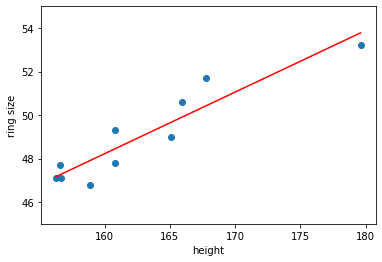


Correlation coefficient r is:  0.9335248086395552
Coefficient of determination r2 is:  0.8714685683455182


In [72]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import math

# the excel file must be in the same directory as this notebook
# name of the excel file is ring-height.xlsx
excel_file= 'ring-height.xlsx'

# via panda, the contents ae read into a variable or data frame named data 
data = pd.read_excel(excel_file)

# get the length of entries in the file 
# and print out the data
entries = len(data)

# calculate the algorithmic mean of x and y
data['x_mean'] = sum(data2['height x'])/len(data2)
data['y_mean'] = sum(data2['ring y'])/len(data2)

# calculate (xi - xmean) and call it x_opt
# calculate (yi - ymean) and call it y_opt
data['x_opt'] = data2['height x'] - data2['x_mean']
data['y_opt'] = data2['ring y'] - data2['y_mean']

#calculate the slope for linear regression
numerator_slope = sum(data['x_opt']*data['y_opt'])
denominator_slope = sum(data['x_opt']**2)

# calculate the slope
m = numerator_slope / denominator_slope
# calculate the y-intercept
b = data['y_mean'][0] - m*data['x_mean'][0]

# draw a scatter plot with the tupels     
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.set_ylabel('ring size')
ax.set_xlabel('height')
ax.set_ylim(45,55)
plt.scatter(data['height x'], data['ring y']) 

# draw the regression line
x_line = [min(data['height x']), max(data['height x'])]
y_line = [b + m*min(data['height x']), b + m*max(data['height x'])]
plt.plot(x_line,y_line,'red')

# show the plot
plt.show()

# calculate the both parts of the fraction
numerator = sum(data['x_opt']*data['y_opt'])
denominator = math.sqrt(sum(data['x_opt']**2)*sum(data['y_opt']**2))

r=numerator/denominator
                        
print ("\nCorrelation coefficient r is: ", r)

rsquared = r**2

print("Coefficient of determination r2 is: ", rsquared)

To make the dataframe access even more general, you can access the first column either by its name data['ring_ y'] or by data[data.columns[0]]

In [80]:
print(data['ring y'])
print(data['height x'])

print(data.columns[0])

print (data[data.columns[0]])

0    47.1
1    46.8
2    49.3
3    53.2
4    47.7
5    49.0
6    50.6
7    47.1
8    51.7
9    47.8
Name: ring y, dtype: float64
0    156.3
1    158.9
2    160.8
3    179.6
4    156.6
5    165.1
6    165.9
7    156.7
8    167.8
9    160.8
Name: height x, dtype: float64
ring y
0    47.1
1    46.8
2    49.3
3    53.2
4    47.7
5    49.0
6    50.6
7    47.1
8    51.7
9    47.8
Name: ring y, dtype: float64


Now that we have completed the ring example, let's move on to the ticket example from the classes. Maybe we can use statisticical functions from the libraries to shorten the code?